<a href="https://colab.research.google.com/github/AlonaShylkina/Exploratory_Analysis_for_Sales_Company/blob/main/Exploratory_Analysis_for_Sales_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.ticker as mticker

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Python_mate/Final_Project

events = pd.read_csv("events.csv")
product = pd.read_csv("products.csv")
country = pd.read_csv("countries.csv")

Mounted at /content/drive
/content/drive/MyDrive/Python_mate/Final_Project


# Events Table

The table has 1330 rows, 10 columns and contains information about orders, such as order id, order/ship date, sales channel, the number of units sold, the price and cost per unit.  
The Product ID column links this table to the Product Table.  
The Code column links this table to the Country Table.

In [ ]:
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
events.shape

(1330, 10)

# Product Table

The table contains 12 rows and 2 columns with information about the products sold by the company.   
The item_type column represents the product category.   
The id column represents the product id and links the table to the Events Table.

In [ ]:
product.head(12)

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


In [ ]:
product.shape

(12, 2)

# Country Table

The table contains 249 rows, 5 columns with information about the countries, along with their regions and subregions.  
The alpha-2 and alpha-3 columns represent county codes.  
The alpha-3 column links the table to the Events Table.

In [ ]:
country.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
country.shape

(249, 5)

# Events Table cleaning

In [ ]:
events.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [ ]:
events.isna().sum() / events.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


Only 0.15% of data is missing in the Unit Sold colunm, so we could delete these 2 rows. However, the Country Code column has more than 6% of missing data. We will categorize these as 'Unidentified' to maintain the relevance of the data.

In [ ]:
events.dropna(subset=["Units Sold"], inplace=True)

In [ ]:
events["Country Code"] = events["Country Code"].fillna("Unidentified")

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1328 non-null   int64  
 1   Order Date      1328 non-null   object 
 2   Ship Date       1328 non-null   object 
 3   Order Priority  1328 non-null   object 
 4   Country Code    1328 non-null   object 
 5   Product ID      1328 non-null   int64  
 6   Sales Channel   1328 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1328 non-null   float64
 9   Unit Cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB


Order Date and Ship Date both should have the datetime data type.

In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])

In [ ]:
events.duplicated().sum()

0

In [ ]:
events["Order Priority"] = events["Order Priority"].str.strip().str.replace(r'\s+', ' ', regex=True)
events["Country Code"] = events["Country Code"].str.strip().str.replace(r'\s+', ' ', regex=True)
events["Sales Channel"] = events["Sales Channel"].str.strip().str.replace(r'\s+', ' ', regex=True)

In [ ]:
events["Sales Channel"].value_counts()

,count
Sales Channel,
Offline,665
Online,660
online,3


In [ ]:
events["Sales Channel"] = events["Sales Channel"].str.replace('online', 'Online')

In [ ]:
events["Sales Channel"].value_counts()

,count
Sales Channel,
Offline,665
Online,663


In [ ]:
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


# Product Table cleaning

In [ ]:
product.isna().sum()

,0
id,0
item_type,0


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [ ]:
product.duplicated().sum()

0

In [ ]:
product["item_type"] = product["item_type"].str.strip().str.replace(r'\s+', ' ', regex=True)

In [ ]:
product.value_counts()

,,count
id,item_type,
1270,Beverages,1
2103,Cereal,1
2455,Clothes,1
3127,Personal Care,1
4594,Fruits,1
5988,Vegetables,1
7331,Baby Food,1
7940,Household,1
8293,Cosmetics,1


# Country Table cleaning

In [ ]:
country.isna().sum()

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


In [ ]:
country[country.isna().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [ ]:
events[events["Country Code"].isin(['NAM', 'ATA'])]

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost


Both items with incomplete data can be removed from the table sinse they have no orders and do not affect the results.

In [ ]:
country.dropna(inplace=True)

In [ ]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        247 non-null    object
 1   alpha-2     247 non-null    object
 2   alpha-3     247 non-null    object
 3   region      247 non-null    object
 4   sub-region  247 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB


In [ ]:
country.duplicated().sum()

0

In [ ]:
for col in country.select_dtypes(include=['object']).columns:
  country[col] = country[col].str.strip().str.replace(r'\s+', ' ', regex=True)

In [ ]:
country.nunique()

,0
name,247
alpha-2,247
alpha-3,247
region,5
sub-region,17


In [ ]:
country[["sub-region", "region"]].value_counts()

,,count
sub-region,region,
Latin America and the Caribbean,Americas,52
Sub-Saharan Africa,Africa,52
Western Asia,Asia,18
Southern Europe,Europe,16
Northern Europe,Europe,16
South-eastern Asia,Asia,11
Eastern Europe,Europe,10
Polynesia,Oceania,10
Western Europe,Europe,9


# Analysis and visualization

In [ ]:
df = (pd.merge(events, product, left_on="Product ID", right_on="id", how="left").merge(country, left_on="Country Code", right_on="alpha-3", how="left"))
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unidentified,7940,Online,4693.0,668.27,502.54,7940,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe


In [ ]:
df.drop(["Product ID", "alpha-2", "Country Code"], axis=1, inplace=True)

In [ ]:
df.rename(columns={"id": "Product ID", "item_type": "Product Category", "name": "Country Name", "alpha-3": "Country Code", "region": "Region",
                   "sub-region": "Sub-Region"}, inplace=True)

In [ ]:
df.fillna("Unidentified", inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,Product ID,Product Category,Country Name,Country Code,Region,Sub-Region
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,2103,Cereal,Norway,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,7940,Household,Unidentified,Unidentified,Unidentified,Unidentified
3,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,SRB,Europe,Southern Europe


In [ ]:
df["Total Revenue"] = df["Units Sold"] * df["Unit Price"]
df["Total Cost"] = df["Units Sold"] * df["Unit Cost"]
df["Total Profit"] = df["Total Revenue"] - df["Total Cost"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1328 non-null   int64         
 1   Order Date        1328 non-null   datetime64[ns]
 2   Ship Date         1328 non-null   datetime64[ns]
 3   Order Priority    1328 non-null   object        
 4   Sales Channel     1328 non-null   object        
 5   Units Sold        1328 non-null   float64       
 6   Unit Price        1328 non-null   float64       
 7   Unit Cost         1328 non-null   float64       
 8   Product ID        1328 non-null   int64         
 9   Product Category  1328 non-null   object        
 10  Country Name      1328 non-null   object        
 11  Country Code      1328 non-null   object        
 12  Region            1328 non-null   object        
 13  Sub-Region        1328 non-null   object        
 14  Total Revenue     1328 n

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,Product ID,Product Category,Country Name,Country Code,Region,Sub-Region,Total Revenue,Total Cost,Total Profit
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,2103,Cereal,Norway,NOR,Europe,Northern Europe,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,SRB,Europe,Southern Europe,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,7940,Household,Unidentified,Unidentified,Unidentified,Unidentified,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,MNE,Europe,Southern Europe,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,SRB,Europe,Southern Europe,362897.60,243129.92,119767.68


# Key Metrics

In [ ]:
total_orders = df["Order ID"].nunique()
print("Total number of company orders:", total_orders)

total_revenue = df["Total Revenue"].sum()
print("Total company revenue:", total_revenue)

total_cost = df["Total Cost"].sum()
print("Total product cost:", total_cost)

total_profit = df["Total Profit"].sum()
print("Tatal company profit:", total_profit)

Total number of company orders: 1328
Total company revenue: 1702129408.21
Total product cost: 1200694949.21
Tatal company profit: 501434459.0


In [ ]:
partner_countries = df[df["Country Name"] != "Unidentified"]["Country Name"].nunique()
print(f"The company works with {partner_countries} countries.")

The company works with 45 countries.


In [ ]:
number_of_products = df["Product Category"].nunique()
print(f"The company sells products in {number_of_products} categories.")

The company sells products in 12 categories.


In [ ]:
orders_per_category = df["Product Category"].value_counts()
orders_per_category

,count
Product Category,
Office Supplies,123
Beverages,121
Vegetables,114
Cosmetics,114
Personal Care,114
Fruits,112
Baby Food,112
Meat,110
Clothes,105


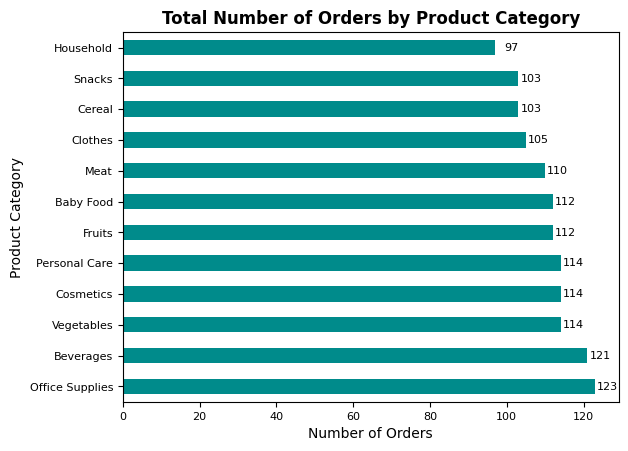

In [ ]:
orders_per_category.plot(kind='barh', color='darkcyan')
plt.title("Total Number of Orders by Product Category", fontweight='bold')
plt.xlabel("Number of Orders")
plt.ylabel("Product Category")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()

for index, value in enumerate(orders_per_category):
  plt.text(value + 6, index, str(value), va='center', ha='right', fontsize=8)

plt.show()

# Sales Metrics by Product Category

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
metrics_by_product = pd.pivot_table(df, values=["Units Sold", "Total Revenue", "Total Cost", "Total Profit"], index="Product Category", aggfunc='sum')
columns_order = ["Units Sold", "Total Revenue", "Total Cost", "Total Profit"]
metrics_by_product = metrics_by_product[columns_order]
metrics_by_product.sort_values("Total Profit", ascending=False)

,Units Sold,Total Revenue,Total Cost,Total Profit
Product Category,,,,
Cosmetics,"533,291.00","233,154,825.20","140,431,519.03","92,723,306.17"
Office Supplies,"617,641.00","402,213,995.61","324,236,819.36","77,977,176.25"
Household,"440,249.00","294,205,199.23","221,242,732.46","72,962,466.77"
Baby Food,"562,706.00","143,647,587.68","89,706,590.52","53,940,997.16"
Clothes,"591,385.00","64,626,552.80","21,195,238.40","43,431,314.40"
Cereal,"465,685.00","95,791,404.50","54,536,370.35","41,255,034.15"
Vegetables,"582,544.00","89,746,728.64","52,970,725.92","36,776,002.72"
Meat,"530,380.00","223,762,018.20","193,424,282.20","30,337,736.00"
Snacks,"490,160.00","74,788,612.80","47,761,190.40","27,027,422.40"


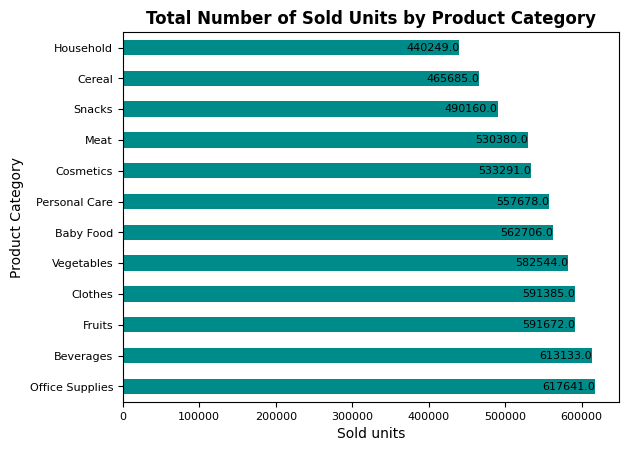

In [ ]:
unit_product = df.groupby("Product Category")["Units Sold"].sum().sort_values(ascending=False)

unit_product.plot(kind='barh', color='darkcyan')
plt.title("Total Number of Sold Units by Product Category", fontweight='bold')
plt.xlabel("Sold units")
plt.ylabel("Product Category")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()

for index, value in enumerate(unit_product):
  plt.text(value, index, str(value), va='center', ha='right', fontsize=8)

plt.show()

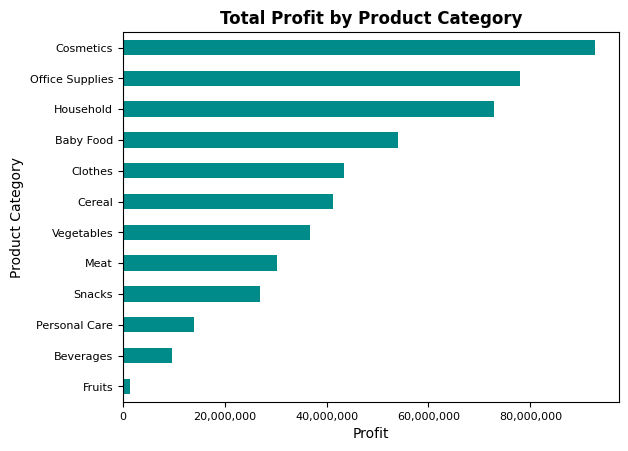

In [ ]:
import matplotlib.ticker as mticker

df.groupby("Product Category")["Total Profit"].sum().sort_values().plot(kind='barh', color='darkcyan')
plt.title("Total Profit by Product Category", fontweight='bold')
plt.xlabel("Profit")
plt.ylabel("Product Category")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

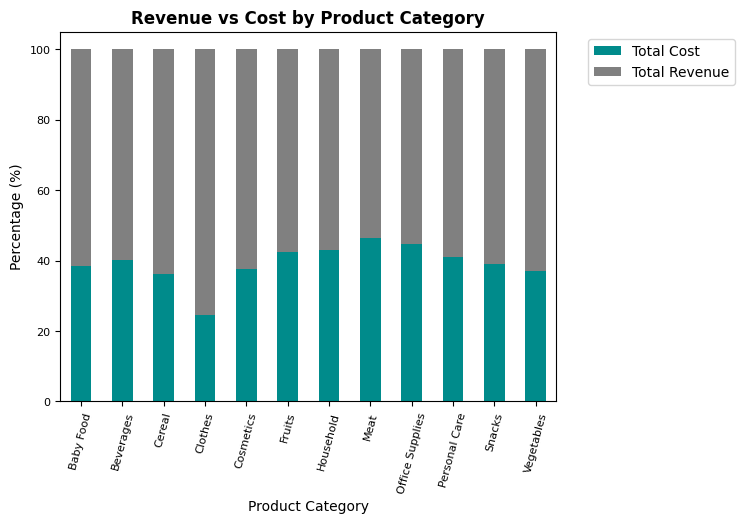

In [ ]:
cost_revenue = df.groupby("Product Category")[["Total Cost", "Total Revenue"]].sum()
cost_revenue_percent = cost_revenue.div(cost_revenue.sum(axis=1), axis=0) * 100

cost_revenue_percent.plot(kind='bar', stacked=True, color=['darkcyan', 'grey'])
plt.title("Revenue vs Cost by Product Category", fontweight='bold')
plt.xlabel("Product Category")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

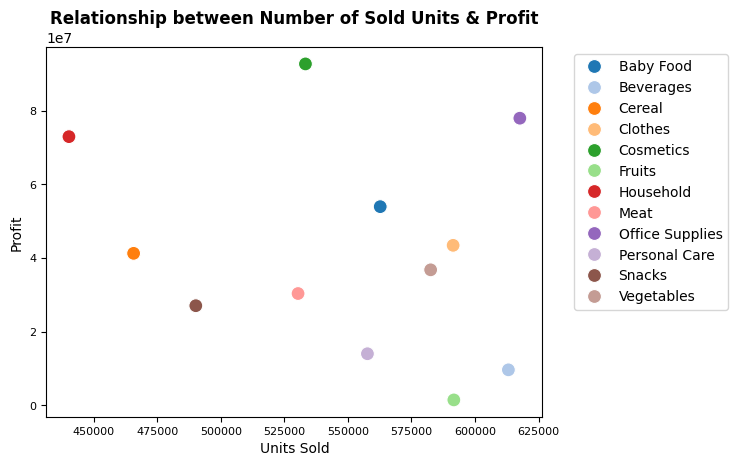

In [ ]:
units_profit = df.groupby("Product Category")[["Units Sold", "Total Profit"]].sum()

sns.scatterplot(data=units_profit, x="Units Sold", y="Total Profit", hue="Product Category" ,palette="tab20", s=100)
plt.title("Relationship between Number of Sold Units & Profit", fontweight='bold')
plt.xlabel("Units Sold")
plt.ylabel("Profit")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The largest number of products were sold in the Office Supplies (617,641 units) and Beverages (613,133 units) categories.                                  
In the same time, the Cosmetics category brought the company the largest profit - \$92,723,306.17 with orders for 533,291 units. While Office Supplies remained in second place with a profit of \$77,977,176.25, and the Beverages category - in 7th place with a profit of \$36,776,002.72.                                                                        
The most profitable category in terms of revenue and expenses is Clothes with a share of revenue of 75% and expenses of 24%, respectively.

# Sales Metrics by Geography

In [ ]:
import plotly.express as px

profit_by_country = df.groupby("Country Name")["Total Profit"].sum().reset_index()

fig = px.choropleth(
    profit_by_country,
    locations="Country Name",
    locationmode='country names',
    color="Total Profit",
    color_continuous_scale='YlGnBu',
    title="Profit Distribution by Country",
    labels={'Profit': 'Profit ($)'},
    width=600, height=400
)

fig.update_geos(
    scope="europe",
    showcountries=True, countrycolor="Black",
    showcoastlines=True, coastlinecolor="Gray",
    projection_type="equirectangular"
)

fig.update_layout(
    title={
        'text': "Profit Distribution by Country",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'weight': 'bold'}
    }
)

fig.show()

In [ ]:
units_profit = df.groupby("Country Name")[["Units Sold", "Total Profit"]].sum().sort_values(by="Total Profit", ascending=False)
units_profit

,Units Sold,Total Profit
Country Name,,
Unidentified,"404,853.00","27,725,423.94"
Andorra,"185,686.00","15,410,036.63"
Ukraine,"164,577.00","14,804,925.74"
Malta,"173,641.00","14,610,127.88"
San Marino,"192,228.00","13,792,992.81"
Hungary,"152,242.00","13,786,231.03"
Macedonia,"203,078.00","13,684,099.95"
Czech Republic,"142,446.00","13,635,593.78"
Russia,"165,954.00","13,267,682.64"


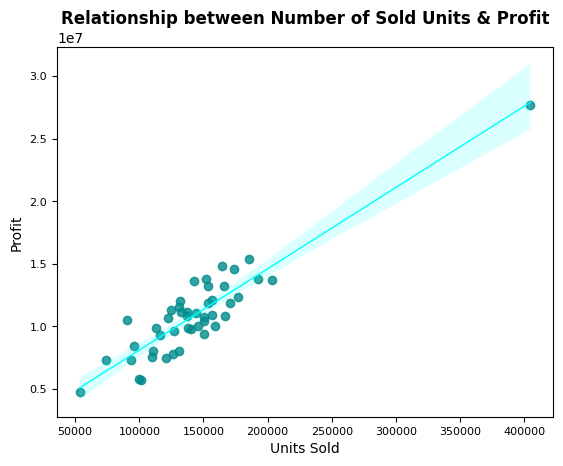

In [ ]:
sns.regplot(data=units_profit, x="Units Sold", y="Total Profit", color="darkcyan", line_kws={"color": "cyan", "linewidth": 1})
plt.title("Relationship between Number of Sold Units & Profit", fontweight='bold')
plt.xlabel("Units Sold")
plt.ylabel("Profit")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
orders_profit = df.groupby("Country Name").agg(orders = ("Order ID", "count"),
                                               profit = ("Total Profit", "sum")).sort_values(by="orders", ascending=False)
orders_profit

,orders,profit
Country Name,,
Unidentified,82,"27,725,423.94"
San Marino,40,"13,792,992.81"
Andorra,40,"15,410,036.63"
Romania,34,"10,793,548.69"
Bosnia and Herzegovina,33,"13,257,602.77"
Ukraine,33,"14,804,925.74"
Malta,32,"14,610,127.88"
Macedonia,32,"13,684,099.95"
Greece,32,"12,324,450.13"


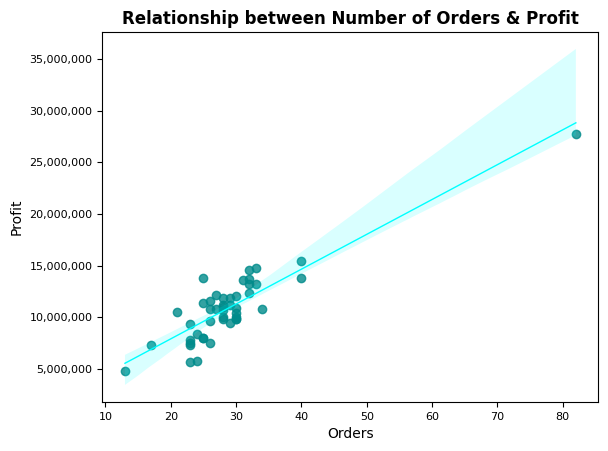

In [ ]:
sns.regplot(data=orders_profit, x="orders", y="profit", color="darkcyan", line_kws={"color": "cyan", "linewidth": 1})
plt.gca().set_title("Relationship between Number of Orders & Profit", fontweight='bold')
plt.xlabel("Orders")
plt.gca().set_ylabel("Profit")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

In [ ]:
metrics_by_geography = df.groupby("Region")[["Units Sold", "Total Cost", "Total Revenue",
                                             "Total Profit"]].sum().sort_values("Total Profit", ascending=False).reset_index()
metrics_by_geography

,Region,Units Sold,Total Cost,Total Revenue,Total Profit
0,Europe,"5,761,244.00","1,057,096,091.78","1,505,652,873.89","448,556,782.11"
1,Unidentified,"404,853.00","75,420,223.01","103,145,646.95","27,725,423.94"
2,Asia,"410,427.00","68,178,634.42","93,330,887.37","25,152,252.95"


In [ ]:
metrics_by_subgeography = df.groupby("Sub-Region")[["Units Sold", "Total Cost", "Total Revenue",
                                             "Total Profit"]].sum().sort_values("Total Profit", ascending=False).reset_index()
metrics_by_subgeography

,Sub-Region,Units Sold,Total Cost,Total Revenue,Total Profit
0,Southern Europe,"2,126,353.00","395,735,835.43","562,032,284.11","166,296,448.68"
1,Eastern Europe,"1,349,811.00","267,413,890.91","378,686,527.47","111,272,636.56"
2,Northern Europe,"1,244,958.00","205,216,928.20","296,410,776.24","91,193,848.04"
3,Western Europe,"1,040,122.00","188,729,437.24","268,523,286.07","79,793,848.83"
4,Unidentified,"404,853.00","75,420,223.01","103,145,646.95","27,725,423.94"
5,Western Asia,"410,427.00","68,178,634.42","93,330,887.37","25,152,252.95"


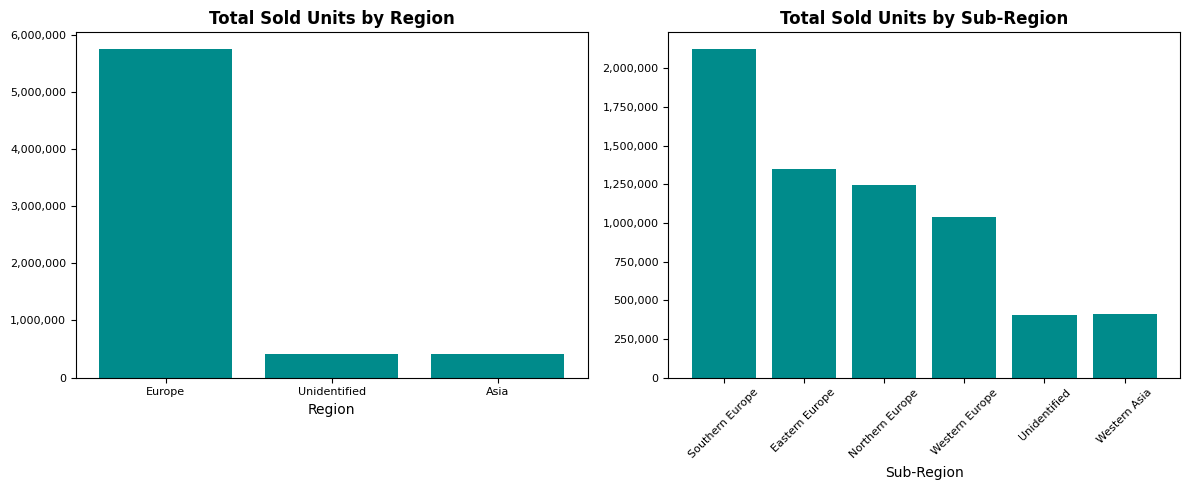

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))

ax1.bar(metrics_by_geography["Region"], metrics_by_geography["Units Sold"], color='darkcyan')
ax1.set_title("Total Sold Units by Region", fontweight='bold')
ax1.set_xlabel("Region")
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

ax2.bar(metrics_by_subgeography["Sub-Region"], metrics_by_subgeography["Units Sold"], color='darkcyan')
ax2.set_title("Total Sold Units by Sub-Region", fontweight='bold')
ax2.set_xlabel("Sub-Region")
ax2.tick_params(axis='x', rotation=45, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()

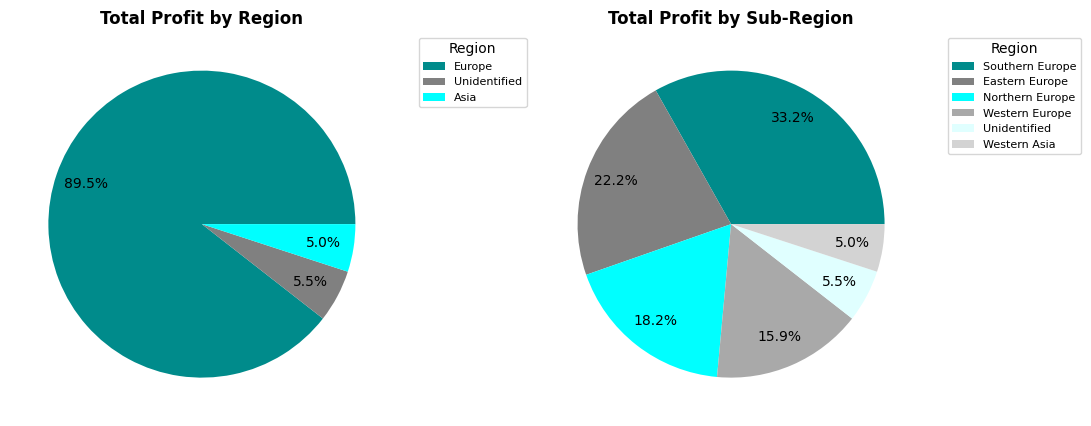

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11, 5))

ax1.pie(metrics_by_geography["Total Profit"], autopct="%1.1f%%", pctdistance=0.8, colors=['darkcyan', 'grey', 'cyan'])
ax1.set_title("Total Profit by Region", fontweight='bold')
ax1.legend(metrics_by_geography["Region"], title="Region", loc='upper left', fontsize=8, bbox_to_anchor=(1.05, 1))

ax2.pie(metrics_by_subgeography["Total Profit"], autopct="%1.1f%%", pctdistance=0.8, colors=['darkcyan', 'grey', 'cyan',
                                                                                            'darkgrey', 'lightcyan', 'lightgrey'])
ax2.set_title("Total Profit by Sub-Region", fontweight='bold')
ax2.legend(metrics_by_subgeography["Sub-Region"], title="Region", loc='upper left', fontsize=8, bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

The vast majority of the company’s business is concentrated in Europe, accounting for 89.5% of its revenue, compared to 5.5% from Asia.       
By country, Andorra leads in terms of orders and revenue.   
However, there is an unpleasant trend: a significant portion of orders and revenue is not geographically determined, which could complicate decisions regarding further regional development.

# Sales Metrics by Sales Channel

In [ ]:
metrics_by_channels = df.groupby("Sales Channel")[["Units Sold", "Total Cost", "Total Revenue",
                                             "Total Profit"]].sum().sort_values("Total Profit", ascending=False)
metrics_by_channels

,Units Sold,Total Cost,Total Revenue,Total Profit
Sales Channel,,,,
Offline,"3,320,363.00","618,294,105.07","871,760,623.88","253,466,518.81"
Online,"3,256,161.00","582,400,844.14","830,368,784.33","247,967,940.19"


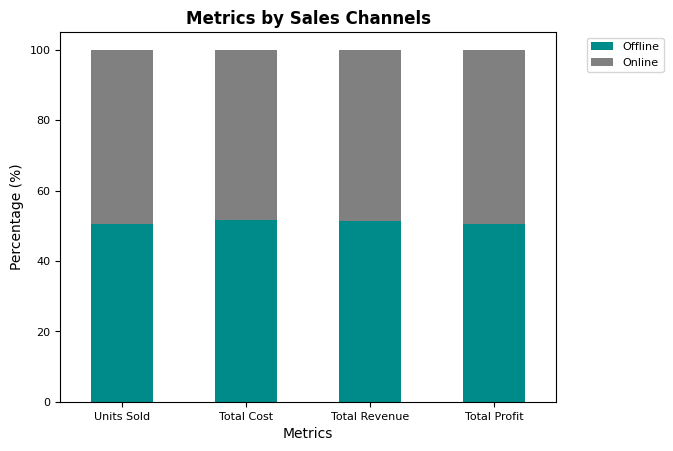

In [ ]:
metrics = df.groupby("Sales Channel")[["Units Sold", "Total Cost", "Total Revenue", "Total Profit"]].sum().sort_values("Total Profit", ascending=False)
metrics_percent = metrics.div(metrics.sum(axis=0), axis=1) * 100

ax = metrics_percent.T.plot(kind='bar', stacked=True, color=['darkcyan', 'grey'])
ax.set_title("Metrics by Sales Channels", fontweight='bold')
ax.set_xlabel("Metrics")
ax.set_ylabel("Percentage (%)")
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

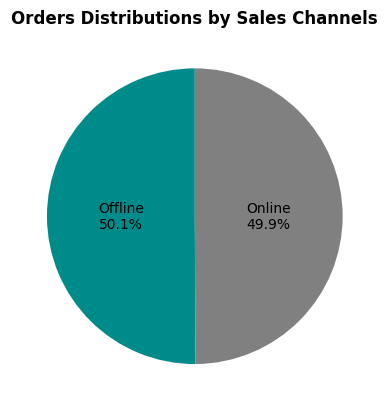

In [ ]:
orders_channels = df.groupby("Sales Channel")["Order ID"].count()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(orders_channels, labels=None, autopct="%1.1f%%", colors=['darkcyan', 'grey'], startangle=90, pctdistance=0.5)
for i, autotext in enumerate(autotexts):
    label = orders_channels.index[i]
    percentage = autotext.get_text()
    autotext.set_text(f'{label}\n{percentage}')
ax.set_title("Orders Distributions by Sales Channels", fontweight='bold')
plt.show()

The company successfully operates through both offline and online channels, with the distribution of orders and profits being almost equal.

# Orders Processing Time

In [ ]:
df["Processing Time"] = df["Ship Date"] - df["Order Date"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Order ID          1328 non-null   int64          
 1   Order Date        1328 non-null   datetime64[ns] 
 2   Ship Date         1328 non-null   datetime64[ns] 
 3   Order Priority    1328 non-null   object         
 4   Sales Channel     1328 non-null   object         
 5   Units Sold        1328 non-null   float64        
 6   Unit Price        1328 non-null   float64        
 7   Unit Cost         1328 non-null   float64        
 8   Product ID        1328 non-null   int64          
 9   Product Category  1328 non-null   object         
 10  Country Name      1328 non-null   object         
 11  Country Code      1328 non-null   object         
 12  Region            1328 non-null   object         
 13  Sub-Region        1328 non-null   object         
 14  Total Re

In [ ]:
df["Processing Time"] = df["Processing Time"].dt.days

In [ ]:
time_product = df.groupby("Product Category")["Processing Time"].median().sort_values(ascending=False)
time_product

,Processing Time
Product Category,
Cereal,29.00
Baby Food,28.50
Cosmetics,28.00
Office Supplies,27.00
Meat,25.00
Snacks,25.00
Household,24.00
Beverages,23.00
Fruits,23.00


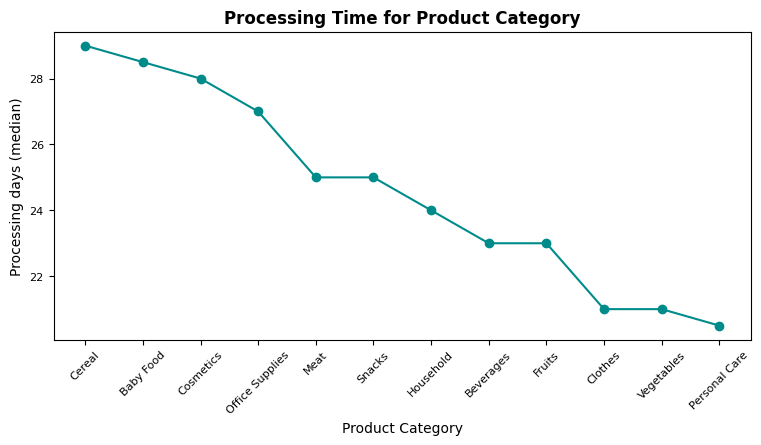

In [ ]:
plt.figure(figsize=(9, 4))
ax = time_product.plot(kind='line', marker='o', color='darkcyan')
ax.set_title("Processing Time for Product Category", fontweight='bold')
plt.xlabel("Product Category")
ax.set_ylabel("Processing days (median)")
ax.set_xticks(range(len(time_product)))
ax.set_xticklabels(time_product.index, rotation=45, fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
time_product_region = df.groupby("Region")["Processing Time"].median().sort_values(ascending=False)
time_product_region


,Processing Time
Region,
Asia,25.50
Europe,25.00
Unidentified,23.50


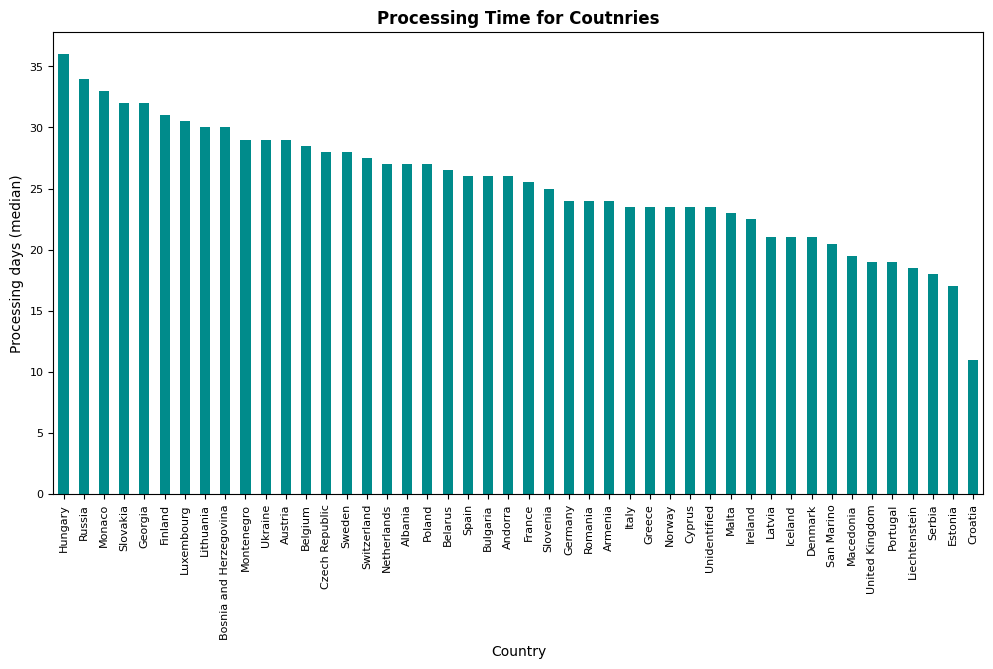

In [ ]:
time_product_country = df.groupby("Country Name")["Processing Time"].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = time_product_country.plot(kind='bar', color='darkcyan')
ax.set_title("Processing Time for Coutnries", fontweight='bold')
plt.xlabel("Country")
ax.set_ylabel("Processing days (median)")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

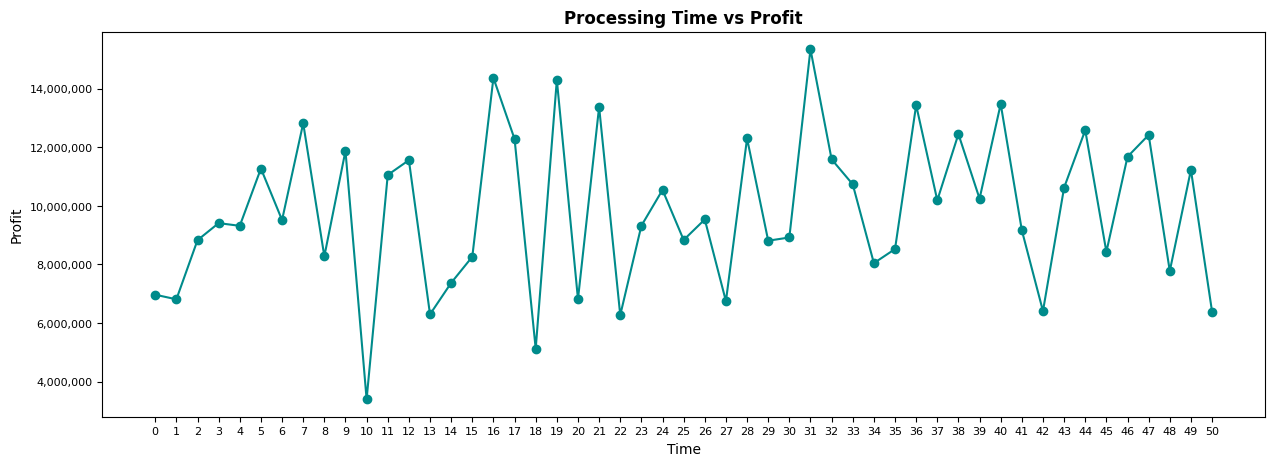

In [ ]:
profit_processing = df.groupby("Processing Time")["Total Profit"].sum()

plt.figure(figsize=(15, 5))
ax = profit_processing.plot(kind='line', marker='o', color='darkcyan')
ax.set_title("Processing Time vs Profit", fontweight='bold')
plt.xlabel("Time")
ax.set_ylabel("Profit")
ax.set_xticks(range(len(profit_processing)))
ax.set_xticklabels(profit_processing.index, rotation=45, fontsize=8)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

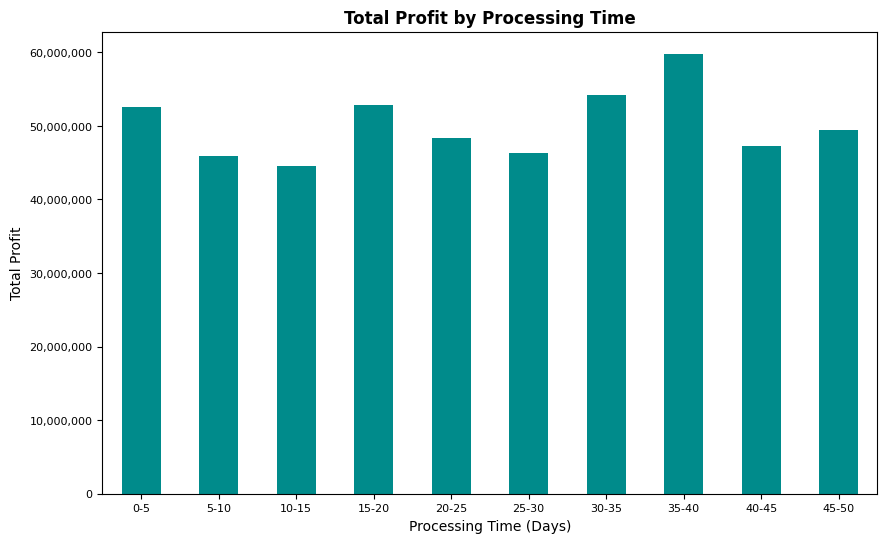

In [ ]:
bins = range(0, 51, 5)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df["Processing Time Range"] = pd.cut(df["Processing Time"], bins=bins, labels=labels, right=True, include_lowest=True)
profit_by_range = df.groupby("Processing Time Range", observed=False)["Total Profit"].sum()

plt.figure(figsize=(10, 6))
ax = profit_by_range.plot(kind="bar", color="darkcyan")
ax.set_title("Total Profit by Processing Time", fontweight="bold")
plt.xlabel("Processing Time (Days)")
ax.set_ylabel("Total Profit")
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

There is a wide range in the time taken to prepare orders for shipment, varying from same-day shipment to 50 days of processing. Interestingly, the company generates the highest profits from orders with the longest processing times. Therefore, we can conclude that orders and profits are not dependent on the processing time.

# Sales Dynamic by Product

In [ ]:
df["Month"] = df["Order Date"].dt.month_name()
df["Month"] = pd.Categorical(df["Month"], categories=['January', 'February', 'March', 'April', 'May',
                                                      'June', 'July', 'August', 'September', 'October',
                                                      'November', 'December'], ordered=True)
df["Year"] = df["Order Date"].dt.year

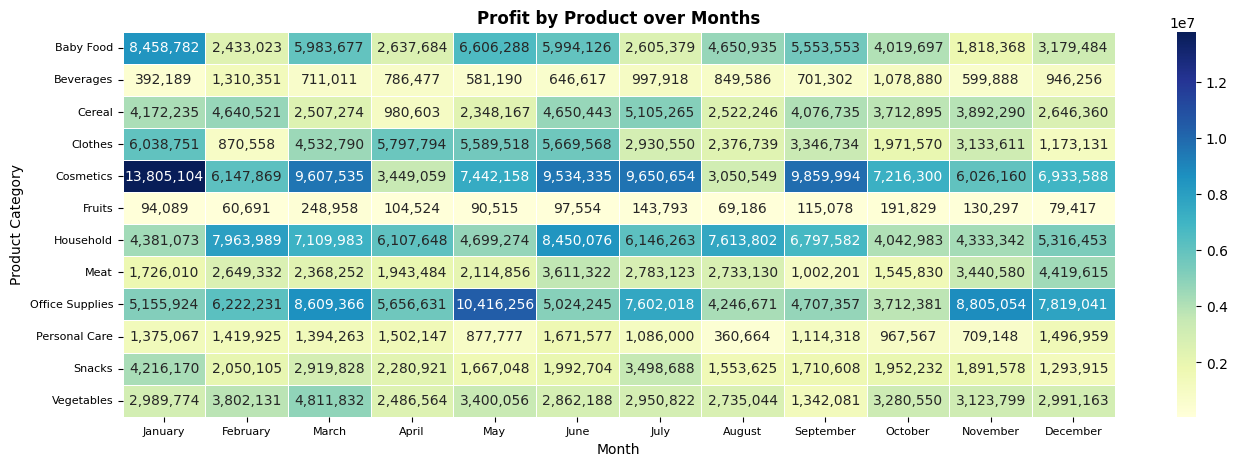

In [ ]:
pivot_df = df.pivot_table(values="Total Profit", index="Product Category", columns="Month", aggfunc='sum', observed=False)

plt.figure(figsize=(16, 5))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=",.0f", linewidths=.5)
plt.gca().set_title('Profit by Product over Months', fontweight="bold")
plt.xlabel('Month')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

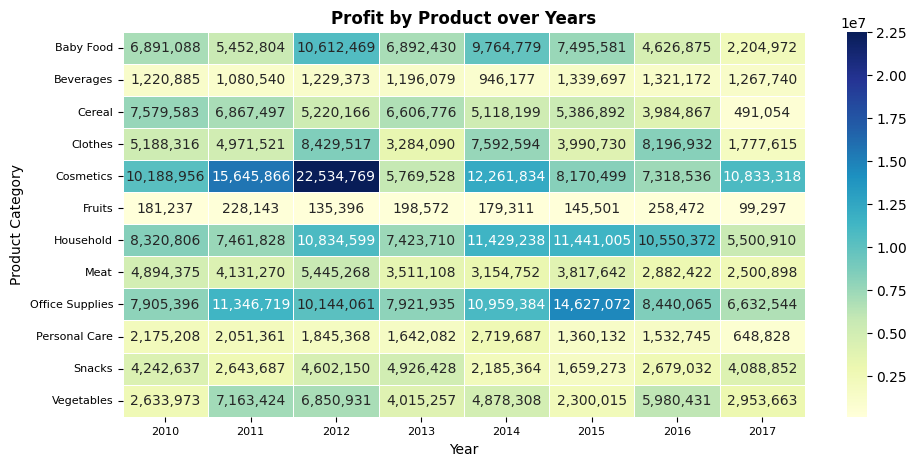

In [ ]:
pivot_df = df.pivot_table(values="Total Profit", index="Product Category", columns="Year", aggfunc='sum')

plt.figure(figsize=(11, 5))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=",.0f", linewidths=.5)
plt.gca().set_title('Profit by Product over Years', fontweight="bold")
plt.xlabel('Year')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Sales Dynamic by Geography

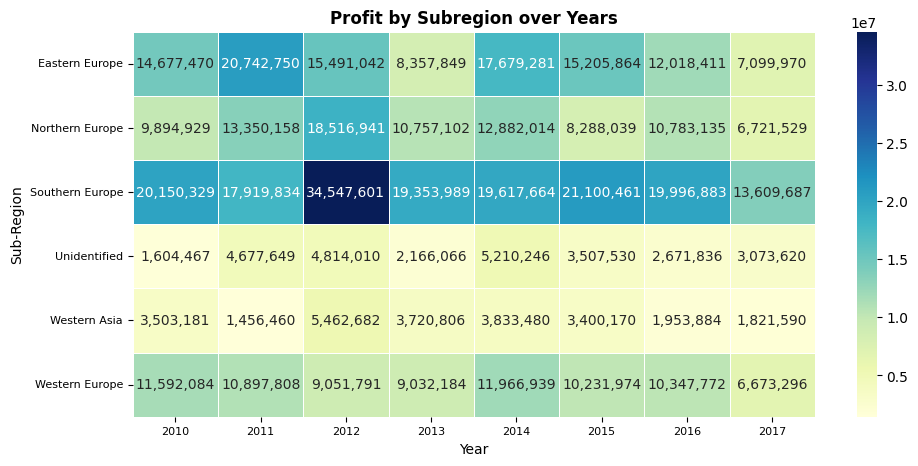

In [ ]:
pivot_df = df.pivot_table(values="Total Profit", index="Sub-Region", columns="Year", aggfunc='sum')
plt.figure(figsize=(11, 5))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=",.0f", linewidths=.5)
plt.gca().set_title('Profit by Subregion over Years', fontweight="bold")
plt.xlabel('Year')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

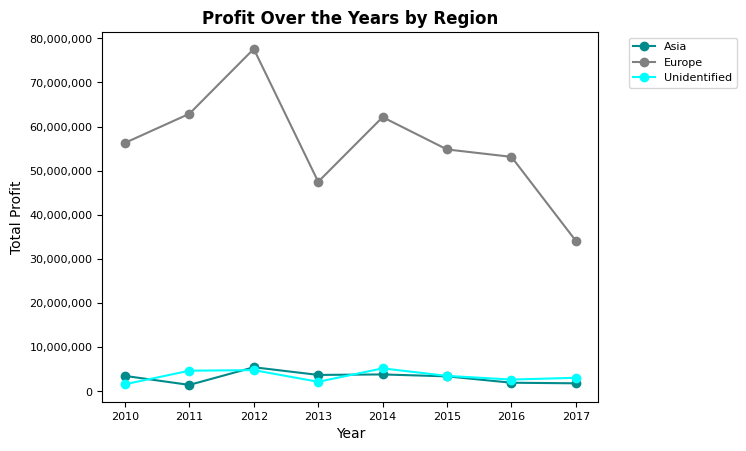

In [ ]:
region_year = df.groupby(['Year', 'Region'], observed=False)['Total Profit'].sum().reset_index()
colors = ['darkcyan', 'grey', 'cyan']

for idx, category in enumerate(region_year['Region'].unique()):
    category_data = region_year[region_year['Region'] == category]
    plt.plot(category_data['Year'].astype(str), category_data['Total Profit'], marker='o', label=category, color=colors[idx % len(colors)])

plt.gca().set_title("Profit Over the Years by Region", fontweight="bold")
plt.xlabel('Year')
plt.gca().set_ylabel('Total Profit')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

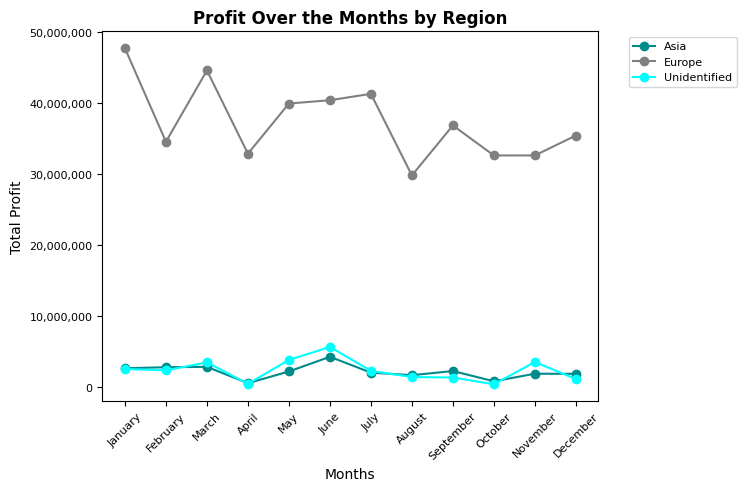

In [ ]:
region_month = df.groupby(['Month', 'Region'], observed=False)['Total Profit'].sum().reset_index()
colors = ['darkcyan', 'grey', 'cyan']

for idx, category in enumerate(region_year['Region'].unique()):
    category_data = region_month[region_month['Region'] == category]
    plt.plot(category_data['Month'].astype(str), category_data['Total Profit'], marker='o', label=category, color=colors[idx % len(colors)])

plt.gca().set_title("Profit Over the Months by Region", fontweight="bold")
plt.xlabel('Months')
plt.gca().set_ylabel('Total Profit')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

Analyzing orders by year, we observe the best year in terms of both the number of products sold and profit was 2012. January stands out as the most profitable month, while Cosmetics is the most profitable category.

Every year, orders without a specific country account for one of the largest shares. Despite this, Europe remains the undisputed leader annually.

# Sales Dynamic by Day of the Week

In [ ]:
df["Day"] = df["Order Date"].dt.day_name()
df["Day"] = pd.Categorical(df["Day"], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                                  'Saturday', 'Sunday'], ordered=True)

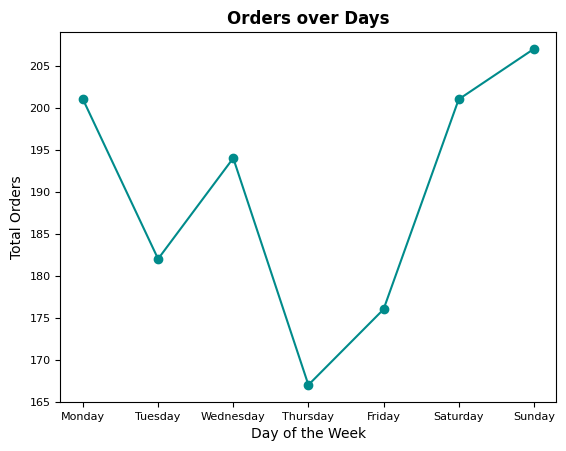

In [ ]:
orders_days = df.groupby("Day", observed=False)["Order ID"].count()

plt.plot(orders_days.index, orders_days.values, marker='o', color='darkcyan')
plt.gca().set_title("Orders over Days", fontweight="bold")
plt.xlabel("Day of the Week")
plt.gca().set_ylabel('Total Orders')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

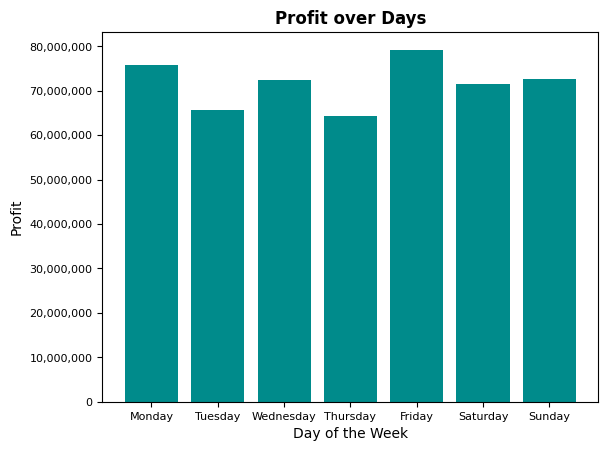

In [ ]:
profit_days = df.groupby("Day", observed=False)["Total Profit"].sum()

plt.bar(profit_days.index, profit_days.values, color='darkcyan')
plt.gca().set_title("Profit over Days", fontweight="bold")
plt.xlabel("Day of the Week")
plt.gca().set_ylabel('Profit')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

It is interesting to note that the company receives the highest number of orders on weekends, while Monday and Thursday generate the most profit.



It is important to continue developing online sales and consider expanding the company’s presence in Asian countries, as well as entering the North and South American markets.

Although there is no correlation between profit and order processing time, the company should implement a faster workflow system. Reducing processing and shipping times is always a good practice.
